In [1]:
source('model_utils.R')
trait <- 21001
DATA.FOLDER <- "/scratch/PI/mrivas/users/erflynn/sex_div_gwas/data/"


maf.range <-  c(0.01, 0.02, 0.03, 0.05, 0.07, 0.10)
se.range <- c(0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4)

Loading required package: MASS
Loading required package: Matrix
Loading required package: mnormt
Loading required package: qqman

For example usage please run: vignette('qqman')

Citation appreciated but not required:
Turner, S.D. qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. biorXiv DOI: 10.1101/005165 (2014).

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.15.1, packaged: 2017-04-19 05:03:57 UTC, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())


In [16]:
col.labels <- c("MAF", "SE", "N", "pi[1]", "pi[2]", "Sigma[1,1]", "Sigma[1,2]", "Sigma[2,1]", "Sigma[2,2]", "rg")
df <- data.frame(matrix(vector(),0, length(col.labels)), dimnames(c(0, col.labels)))
#df <- rbind(df, col.labels)
#colnames(df) <- col.labels

for (i in maf.range){
    for (j in se.range){
        print(sprintf("Looking at MAF: %s SE: %s", i, j))
        
        load(sprintf("%s/test_pars/test_%s_m%s_s%s.RData", DATA.FOLDER, trait, i, j))
        print(dat$dat$N)
        m1.pi <- c(f1$par["pi[1]"], f1$par["pi[2]"])
        m1.Sigma <- c(f1$par['Sigma[1,1]'], f1$par['Sigma[1,2]'], 
              f1$par['Sigma[2,1]'], f1$par['Sigma[2,2]'])

        print(m1.pi)
        print(m1.Sigma)
        rg <- getRg(matrix(m1.Sigma, c(2,2))) # seems high...
        print(rg)
        next.row <- c(i, j, dat$dat$N, unlist(m1.pi), unlist(m1.Sigma), rg)
        df <- rbind(df, next.row)
    }
}


[1] "Looking at MAF: 0.01 SE: 0.05"
[1] 300077
    pi[1]     pi[2] 
0.6079156 0.3920844 
  Sigma[1,1]   Sigma[1,2]   Sigma[2,1]   Sigma[2,2] 
3.525443e-05 3.681327e-05 3.681327e-05 3.844104e-05 
[1] 1
[1] "Looking at MAF: 0.01 SE: 0.1"
[1] 314870
    pi[1]     pi[2] 
0.6074134 0.3925866 
  Sigma[1,1]   Sigma[1,2]   Sigma[2,1]   Sigma[2,2] 
3.523245e-05 3.678904e-05 3.678904e-05 3.841444e-05 
[1] 0.9999996
[1] "Looking at MAF: 0.01 SE: 0.15"
[1] 320311
    pi[1]     pi[2] 
0.6075596 0.3924404 
  Sigma[1,1]   Sigma[1,2]   Sigma[2,1]   Sigma[2,2] 
3.523888e-05 3.680489e-05 3.680489e-05 3.844050e-05 
[1] 1
[1] "Looking at MAF: 0.01 SE: 0.2"
[1] 323880
   pi[1]    pi[2] 
0.607355 0.392645 
  Sigma[1,1]   Sigma[1,2]   Sigma[2,1]   Sigma[2,2] 
3.521372e-05 3.677828e-05 3.677828e-05 3.841281e-05 
[1] 0.9999941
[1] "Looking at MAF: 0.01 SE: 0.25"
[1] 326659
    pi[1]     pi[2] 
0.6073985 0.3926015 
  Sigma[1,1]   Sigma[1,2]   Sigma[2,1]   Sigma[2,2] 
3.522778e-05 3.678960e-05 3.678960e-05 3.842

In [17]:
colnames(df) <- col.labels
head(df)

MAF,SE,N,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg
0.01,0.05,300077,0.6079156,0.3920844,3.525443e-05,3.681327e-05,3.681327e-05,3.844104e-05,1.0000000
0.01,0.10,314870,0.6074134,0.3925866,3.523245e-05,3.678904e-05,3.678904e-05,3.841444e-05,0.9999996
0.01,0.15,320311,0.6075596,0.3924404,3.523888e-05,3.680489e-05,3.680489e-05,3.844050e-05,1.0000000
0.01,0.20,323880,0.6073550,0.3926450,3.521372e-05,3.677828e-05,3.677828e-05,3.841281e-05,0.9999941
0.01,0.25,326659,0.6073985,0.3926015,3.522778e-05,3.678960e-05,3.678960e-05,3.842067e-05,1.0000000
0.01,0.30,328593,0.6073733,0.3926267,3.522877e-05,3.678621e-05,3.678621e-05,3.841251e-05,1.0000000


In [19]:
summary(df)

      MAF              SE               N              pi[1]       
 Min.   :0.010   Min.   :0.0500   Min.   : 29688   Min.   :0.5844  
 1st Qu.:0.050   1st Qu.:0.1000   1st Qu.: 41881   1st Qu.:0.5918  
 Median :0.100   Median :0.2000   Median : 62007   Median :0.5971  
 Mean   :0.102   Mean   :0.2071   Mean   :112892   Mean   :0.5960  
 3rd Qu.:0.150   3rd Qu.:0.3000   3rd Qu.:109804   3rd Qu.:0.5987  
 Max.   :0.200   Max.   :0.4000   Max.   :333184   Max.   :0.6079  
     pi[2]          Sigma[1,1]          Sigma[1,2]          Sigma[2,1]       
 Min.   :0.3921   Min.   :1.779e-05   Min.   :1.733e-05   Min.   :1.733e-05  
 1st Qu.:0.4013   1st Qu.:1.957e-05   1st Qu.:1.917e-05   1st Qu.:1.917e-05  
 Median :0.4029   Median :2.116e-05   Median :2.092e-05   Median :2.092e-05  
 Mean   :0.4040   Mean   :2.392e-05   Mean   :2.419e-05   Mean   :2.419e-05  
 3rd Qu.:0.4082   3rd Qu.:2.602e-05   3rd Qu.:2.682e-05   3rd Qu.:2.682e-05  
 Max.   :0.4156   Max.   :3.572e-05   Max.   :3.681e-05 

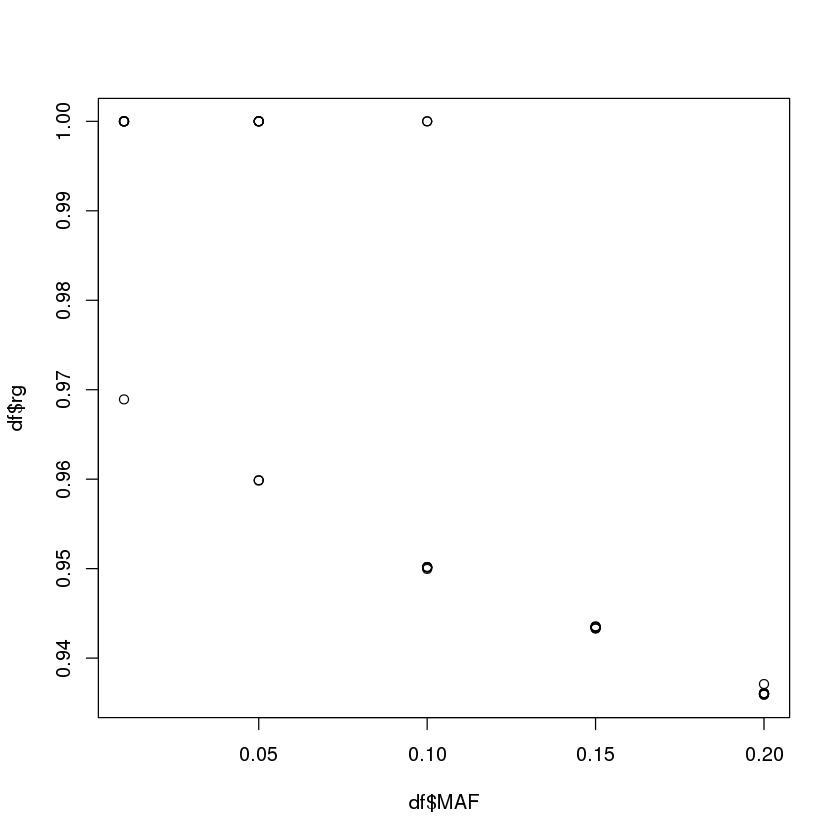

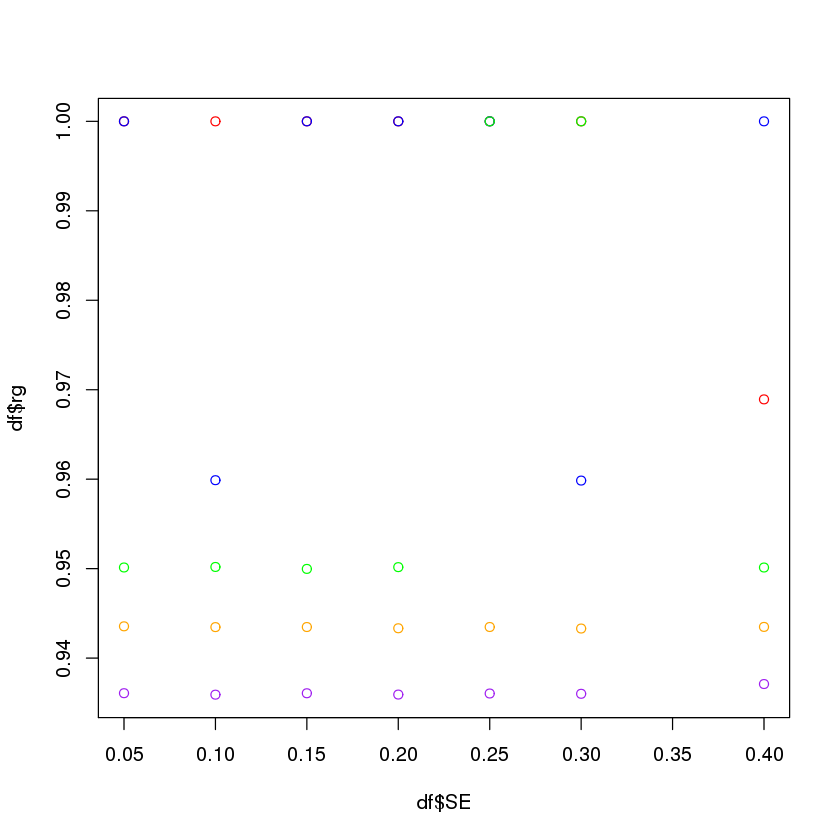

In [31]:
plot(df$rg ~ df$MAF)
plot(df$rg ~ df$SE, col=c("red", "blue", "green", "orange", "purple")[sapply(df$MAF, as.factor)])

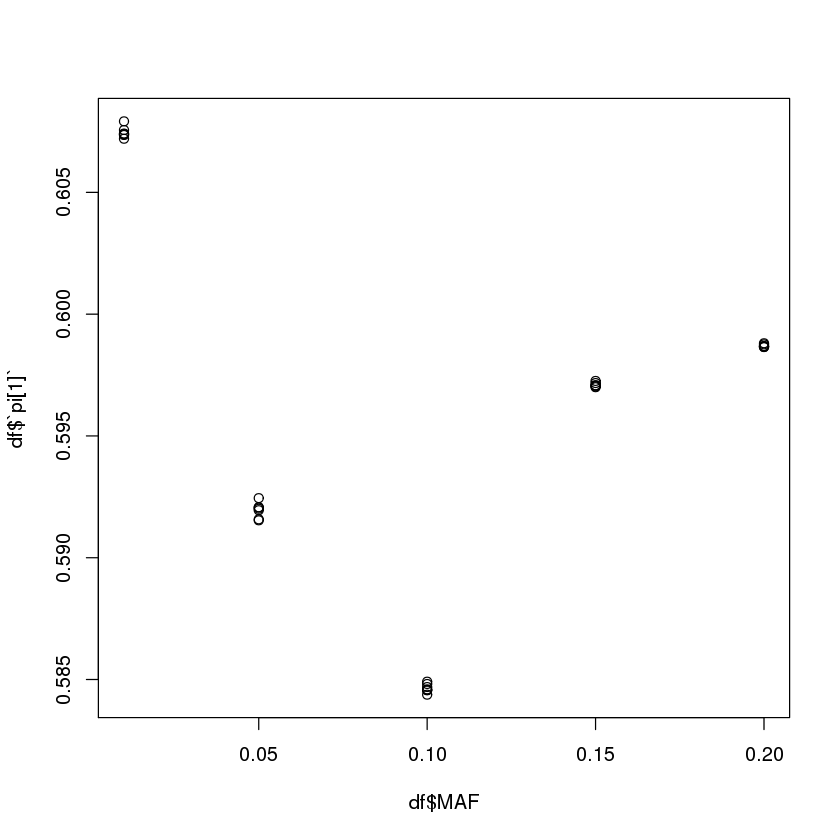

In [33]:
plot(df$`pi[1]` ~ df$MAF)

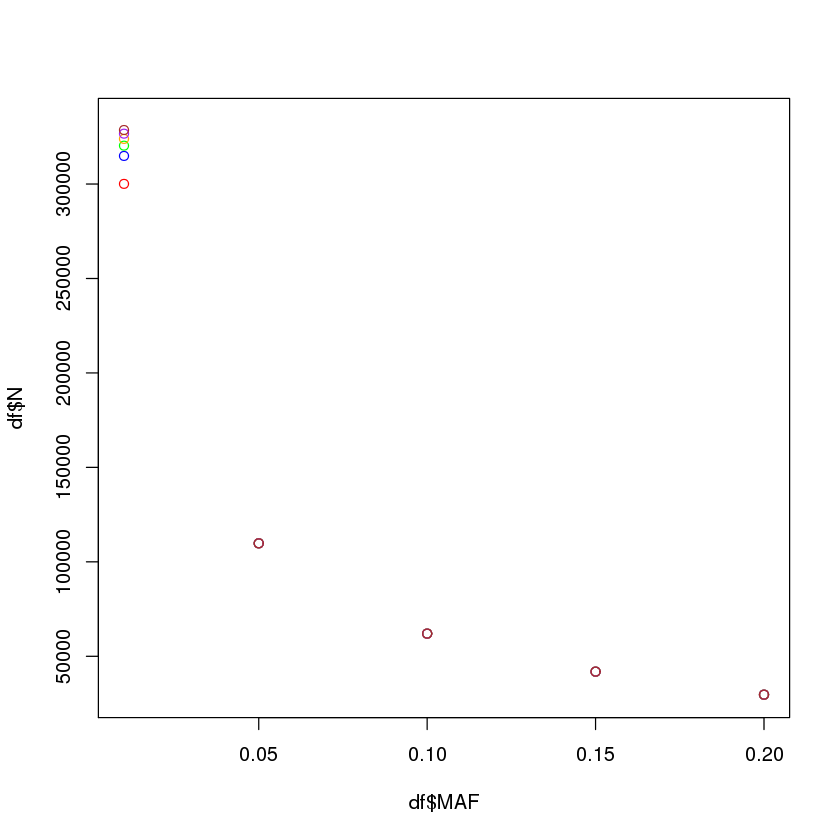

In [28]:
plot(df$N ~ df$MAF, col=c("red", "blue", "green", "orange", "purple", "brown")[sapply(df$SE, as.factor)])

In [3]:
#df <- rbind(df, col.labels)
#colnames(df) <- col.labels
loadVaryPars <- function(trait){
    col.labels <- c("MAF", "SE", "N", "pi[1]", "pi[2]", "Sigma[1,1]", "Sigma[1,2]", "Sigma[2,1]", "Sigma[2,2]", "rg")
    df <- data.frame(matrix(vector(),0, length(col.labels)), dimnames(c(0, col.labels)))

    for (i in maf.range){
        for (j in se.range){
            #print(sprintf("Looking at MAF: %s SE: %s", i, j))

            load(sprintf("%s/test_pars/testv_%s_m%s_s%s.RData", DATA.FOLDER, trait, i, j))
            #print(dat$dat$N)
            m1.pi <- c(f1$par["pi[1]"], f1$par["pi[2]"])
            m1.Sigma <- c(f1$par['Sigma[1,1]'], f1$par['Sigma[1,2]'], 
                  f1$par['Sigma[2,1]'], f1$par['Sigma[2,2]'])

            #print(m1.pi)
            #print(m1.Sigma)
            rg <- f1$par["Omegacor[2,1]"] #getRg(matrix(m1.Sigma, c(2,2))) # seems high...
            #print(rg)
            next.row <- c(i, j, dat$dat$N, unlist(m1.pi), unlist(m1.Sigma), rg)
            df <- rbind(df, next.row)
        }
    }

    colnames(df) <- col.labels
    return(df)
}


In [4]:
df <- loadVaryPars(21001)
summary(df)
df[df$rg < 0,]
df[df$`pi[1]` < 0.5,]

# filter out three rows that don't make sense, I expect these are local minima
df.filt <- df[df$`pi[1]` > 0.5 & df$rg > 0,] 
summary(df.filt)

      MAF                SE               N              pi[1]       
 Min.   :0.01000   Min.   :0.0500   Min.   : 62012   Min.   :0.0000  
 1st Qu.:0.02000   1st Qu.:0.1000   1st Qu.: 83420   1st Qu.:0.5905  
 Median :0.04000   Median :0.2000   Median :136794   Median :0.5929  
 Mean   :0.04667   Mean   :0.2071   Mean   :158535   Mean   :0.5938  
 3rd Qu.:0.07000   3rd Qu.:0.3000   3rd Qu.:211086   3rd Qu.:0.6081  
 Max.   :0.10000   Max.   :0.4000   Max.   :333213   Max.   :1.0000  
     pi[2]          Sigma[1,1]          Sigma[1,2]           Sigma[2,1]        
 Min.   :0.0000   Min.   :1.134e-05   Min.   :-6.807e-05   Min.   :-6.807e-05  
 1st Qu.:0.3919   1st Qu.:2.339e-05   1st Qu.: 2.372e-05   1st Qu.: 2.372e-05  
 Median :0.4071   Median :2.588e-05   Median : 2.692e-05   Median : 2.692e-05  
 Mean   :0.4062   Mean   :2.846e-05   Mean   : 2.634e-05   Mean   : 2.634e-05  
 3rd Qu.:0.4095   3rd Qu.:3.324e-05   3rd Qu.: 3.467e-05   3rd Qu.: 3.467e-05  
 Max.   :1.0000   Max.   :5.98

MAF,SE,N,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg
0.01,0.05,300096,1,4.018024e-10,5.981869e-05,-6.807319e-05,-6.807319e-05,7.786368e-05,-0.9974479


,MAF,SE,N,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg
21,0.03,0.4,163770,6.162173e-16,1,1.134299e-05,1.172934e-05,1.172934e-05,1.212885e-05,1


      MAF              SE               N              pi[1]       
 Min.   :0.010   Min.   :0.0500   Min.   : 62012   Min.   :0.5862  
 1st Qu.:0.020   1st Qu.:0.1000   1st Qu.: 83420   1st Qu.:0.5907  
 Median :0.050   Median :0.2000   Median :109818   Median :0.5929  
 Mean   :0.048   Mean   :0.2062   Mean   :154865   Mean   :0.5984  
 3rd Qu.:0.070   3rd Qu.:0.3000   3rd Qu.:211086   3rd Qu.:0.6081  
 Max.   :0.100   Max.   :0.4000   Max.   :333213   Max.   :0.6087  
     pi[2]          Sigma[1,1]          Sigma[1,2]          Sigma[2,1]       
 Min.   :0.3913   Min.   :2.078e-05   Min.   :2.103e-05   Min.   :2.103e-05  
 1st Qu.:0.3919   1st Qu.:2.340e-05   1st Qu.:2.414e-05   1st Qu.:2.414e-05  
 Median :0.4071   Median :2.588e-05   Median :2.692e-05   Median :2.692e-05  
 Mean   :0.4016   Mean   :2.811e-05   Mean   :2.907e-05   Mean   :2.907e-05  
 3rd Qu.:0.4093   3rd Qu.:3.323e-05   3rd Qu.:3.468e-05   3rd Qu.:3.468e-05  
 Max.   :0.4138   Max.   :3.543e-05   Max.   :3.701e-05 

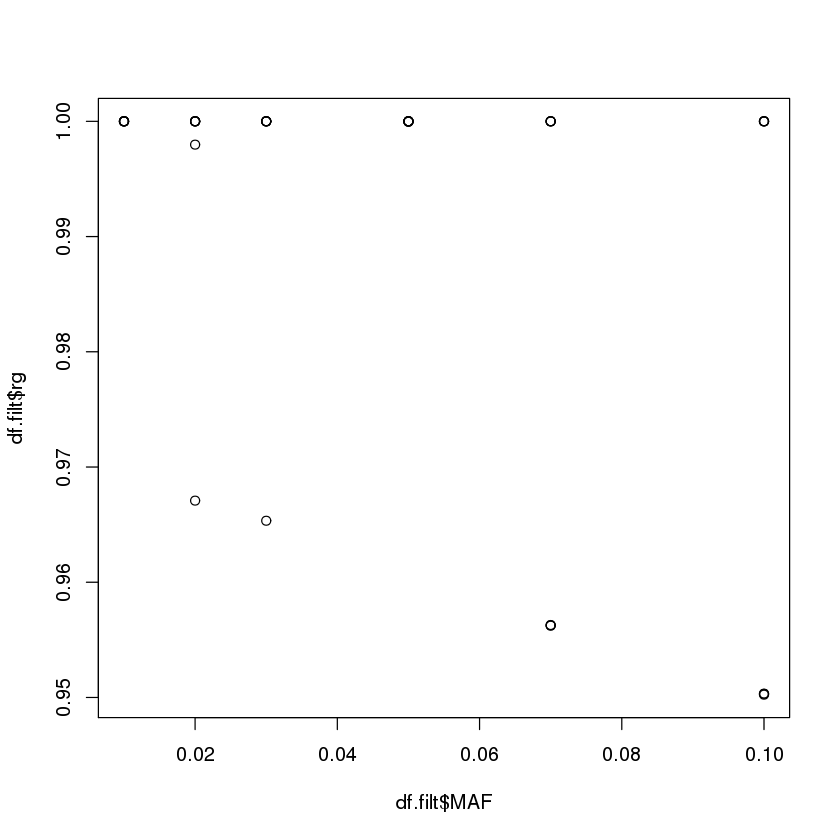

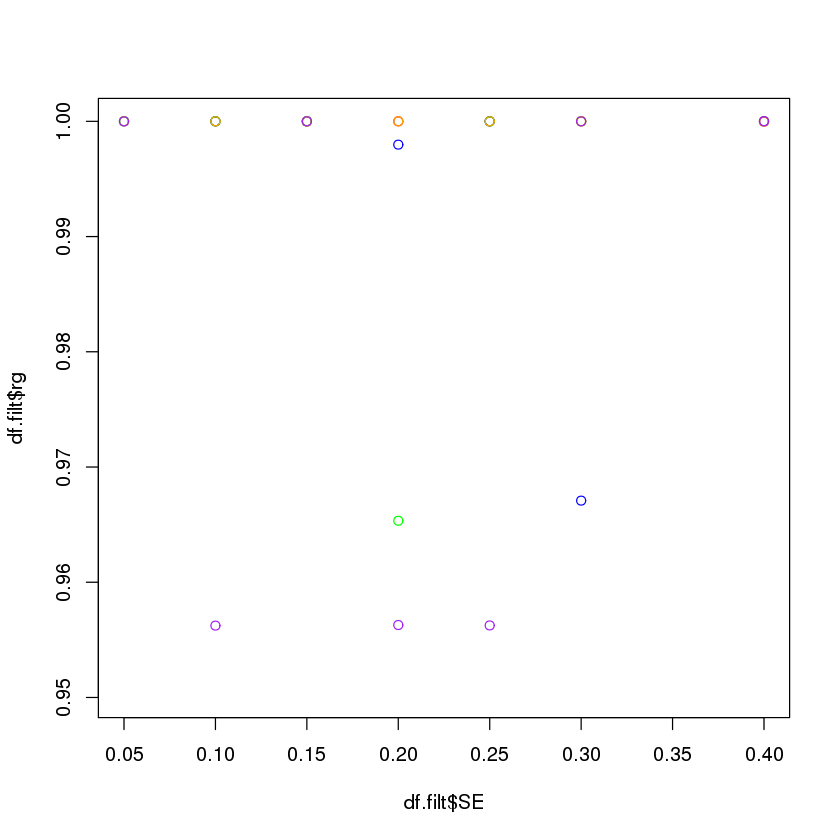

In [5]:
plot(df.filt$rg ~ df.filt$MAF)
plot(df.filt$rg ~ df.filt$SE, col=c("red", "blue", "green", "orange", "purple")[sapply(df.filt$MAF, as.factor)])

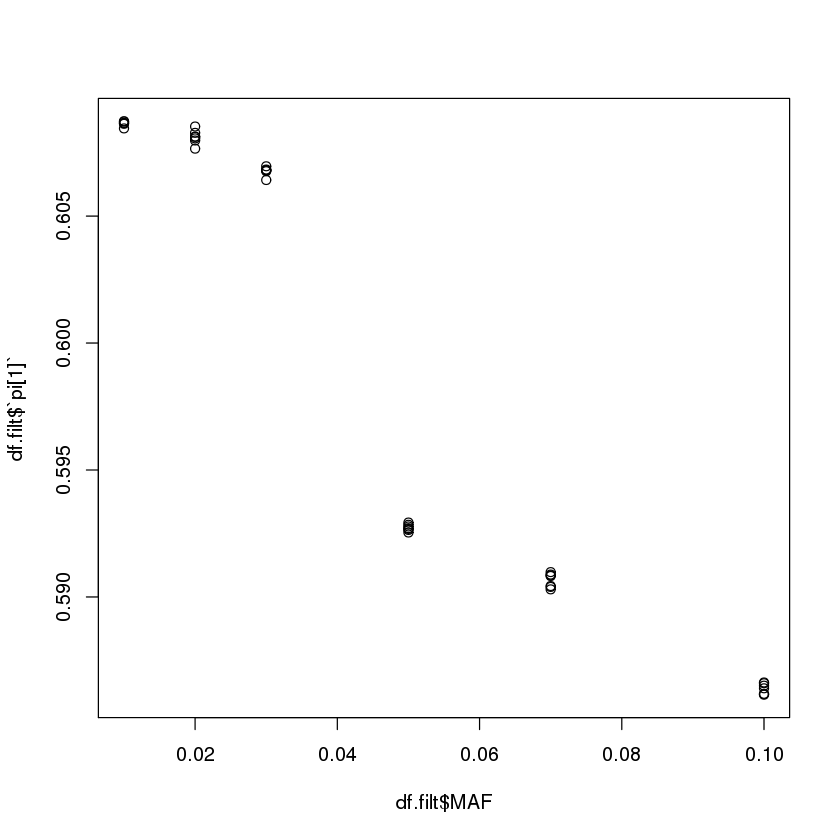

In [6]:
plot(df.filt$`pi[1]` ~ df.filt$MAF)

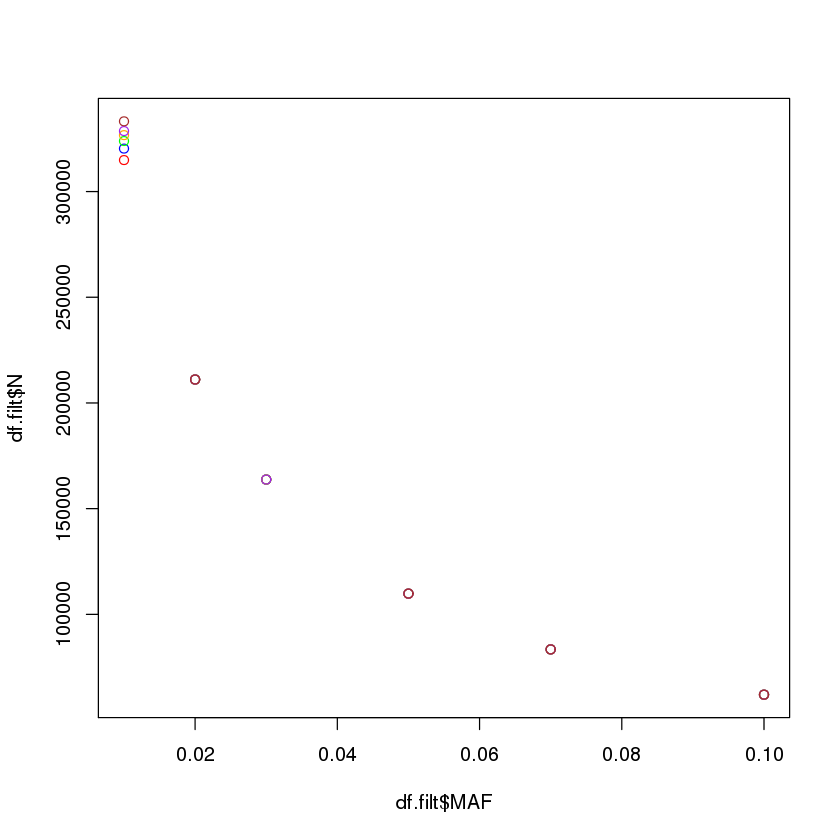

In [7]:
plot(df.filt$N ~ df.filt$MAF, col=c("red", "blue", "green", "orange", "purple", "brown")[sapply(df.filt$SE, as.factor)])

In [9]:
df.height <- loadVaryPars(50)
df.hc <- loadVaryPars(49)
df.whr <- loadVaryPars('whr')

In [10]:
summary(df.height)
summary(df.hc)
summary(df.whr)

      MAF                SE               N              pi[1]       
 Min.   :0.01000   Min.   :0.0500   Min.   : 62018   Min.   :0.6660  
 1st Qu.:0.02000   1st Qu.:0.1000   1st Qu.: 83425   1st Qu.:0.6710  
 Median :0.04000   Median :0.2000   Median :136788   Median :0.6732  
 Mean   :0.04667   Mean   :0.2071   Mean   :158604   Mean   :0.6899  
 3rd Qu.:0.07000   3rd Qu.:0.3000   3rd Qu.:211059   3rd Qu.:0.6784  
 Max.   :0.10000   Max.   :0.4000   Max.   :334640   Max.   :1.0000  
     pi[2]          Sigma[1,1]          Sigma[1,2]           Sigma[2,1]        
 Min.   :0.0000   Min.   :9.902e-08   Min.   :-1.173e-06   Min.   :-1.173e-06  
 1st Qu.:0.3216   1st Qu.:7.172e-05   1st Qu.: 6.974e-05   1st Qu.: 6.974e-05  
 Median :0.3268   Median :8.297e-05   Median : 8.091e-05   Median : 8.091e-05  
 Mean   :0.3101   Mean   :8.666e-05   Mean   : 8.471e-05   Mean   : 8.471e-05  
 3rd Qu.:0.3290   3rd Qu.:1.096e-04   3rd Qu.: 1.080e-04   3rd Qu.: 1.080e-04  
 Max.   :0.3340   Max.   :1.32

      MAF                SE               N              pi[1]       
 Min.   :0.01000   Min.   :0.0500   Min.   : 62003   Min.   :0.0000  
 1st Qu.:0.02000   1st Qu.:0.1000   1st Qu.: 83409   1st Qu.:0.6578  
 Median :0.04000   Median :0.2000   Median :136768   Median :0.6600  
 Mean   :0.04667   Mean   :0.2071   Mean   :158502   Mean   :0.6451  
 3rd Qu.:0.07000   3rd Qu.:0.3000   3rd Qu.:211041   3rd Qu.:0.6640  
 Max.   :0.10000   Max.   :0.4000   Max.   :333089   Max.   :0.6647  
     pi[2]          Sigma[1,1]          Sigma[1,2]          Sigma[2,1]       
 Min.   :0.3353   Min.   :1.096e-05   Min.   :1.124e-05   Min.   :1.124e-05  
 1st Qu.:0.3360   1st Qu.:2.590e-05   1st Qu.:2.707e-05   1st Qu.:2.707e-05  
 Median :0.3400   Median :2.895e-05   Median :2.978e-05   Median :2.978e-05  
 Mean   :0.3549   Mean   :3.010e-05   Mean   :3.101e-05   Mean   :3.101e-05  
 3rd Qu.:0.3422   3rd Qu.:3.519e-05   3rd Qu.:3.661e-05   3rd Qu.:3.661e-05  
 Max.   :1.0000   Max.   :3.734e-05   Max.

      MAF                SE               N              pi[1]       
 Min.   :0.01000   Min.   :0.0500   Min.   : 62013   Min.   :0.6805  
 1st Qu.:0.02000   1st Qu.:0.1000   1st Qu.: 83415   1st Qu.:0.6948  
 Median :0.04000   Median :0.2000   Median :136776   Median :0.6961  
 Mean   :0.04667   Mean   :0.2071   Mean   :158550   Mean   :0.7088  
 3rd Qu.:0.07000   3rd Qu.:0.3000   3rd Qu.:211053   3rd Qu.:0.6989  
 Max.   :0.10000   Max.   :0.4000   Max.   :333116   Max.   :0.8015  
     pi[2]          Sigma[1,1]          Sigma[1,2]           Sigma[2,1]        
 Min.   :0.1985   Min.   :2.560e-05   Min.   :-3.000e-12   Min.   :-3.000e-12  
 1st Qu.:0.3011   1st Qu.:2.905e-05   1st Qu.: 1.642e-05   1st Qu.: 1.642e-05  
 Median :0.3039   Median :3.250e-05   Median : 2.041e-05   Median : 2.041e-05  
 Mean   :0.2912   Mean   :3.510e-05   Mean   : 1.896e-05   Mean   : 1.896e-05  
 3rd Qu.:0.3052   3rd Qu.:3.856e-05   3rd Qu.: 2.607e-05   3rd Qu.: 2.607e-05  
 Max.   :0.3195   Max.   :5.70

In [11]:
df.height.filt <- df.height[df.height$`pi[1]` > 0.5 & df.height$rg > 0,] 
summary(df.height.filt)

df.hc.filt <- df.hc[(df.hc$`pi[1]` > 0.5) & (df.hc$rg > 0),] 
summary(df.hc.filt)

df.whr.filt <- df.whr[(df.whr$`pi[1]` > 0.5) & (df.whr$rg > 0),] 
summary(df.whr.filt)


      MAF                SE               N              pi[1]       
 Min.   :0.01000   Min.   :0.0500   Min.   : 62018   Min.   :0.6660  
 1st Qu.:0.02000   1st Qu.:0.1000   1st Qu.: 83425   1st Qu.:0.6710  
 Median :0.05000   Median :0.2000   Median :109819   Median :0.6712  
 Mean   :0.04756   Mean   :0.2061   Mean   :154506   Mean   :0.6824  
 3rd Qu.:0.07000   3rd Qu.:0.3000   3rd Qu.:211059   3rd Qu.:0.6784  
 Max.   :0.10000   Max.   :0.4000   Max.   :334640   Max.   :1.0000  
     pi[2]          Sigma[1,1]          Sigma[1,2]          Sigma[2,1]       
 Min.   :0.0000   Min.   :9.902e-08   Min.   :8.803e-08   Min.   :8.803e-08  
 1st Qu.:0.3216   1st Qu.:7.173e-05   1st Qu.:6.976e-05   1st Qu.:6.976e-05  
 Median :0.3288   Median :8.297e-05   Median :8.091e-05   Median :8.091e-05  
 Mean   :0.3176   Mean   :8.874e-05   Mean   :8.681e-05   Mean   :8.681e-05  
 3rd Qu.:0.3290   3rd Qu.:1.096e-04   3rd Qu.:1.082e-04   3rd Qu.:1.082e-04  
 Max.   :0.3340   Max.   :1.320e-04   Max.

      MAF                SE               N              pi[1]       
 Min.   :0.01000   Min.   :0.0500   Min.   : 62003   Min.   :0.6553  
 1st Qu.:0.02000   1st Qu.:0.1000   1st Qu.: 83409   1st Qu.:0.6578  
 Median :0.05000   Median :0.2000   Median :109801   Median :0.6600  
 Mean   :0.04732   Mean   :0.2049   Mean   :157221   Mean   :0.6608  
 3rd Qu.:0.07000   3rd Qu.:0.3000   3rd Qu.:211041   3rd Qu.:0.6640  
 Max.   :0.10000   Max.   :0.4000   Max.   :333089   Max.   :0.6647  
     pi[2]          Sigma[1,1]          Sigma[1,2]          Sigma[2,1]       
 Min.   :0.3353   Min.   :2.340e-05   Min.   :2.364e-05   Min.   :2.364e-05  
 1st Qu.:0.3360   1st Qu.:2.590e-05   1st Qu.:2.707e-05   1st Qu.:2.707e-05  
 Median :0.3400   Median :2.931e-05   Median :2.978e-05   Median :2.978e-05  
 Mean   :0.3392   Mean   :3.057e-05   Mean   :3.150e-05   Mean   :3.150e-05  
 3rd Qu.:0.3422   3rd Qu.:3.519e-05   3rd Qu.:3.661e-05   3rd Qu.:3.661e-05  
 Max.   :0.3447   Max.   :3.734e-05   Max.

      MAF                SE               N              pi[1]       
 Min.   :0.01000   Min.   :0.0500   Min.   : 62013   Min.   :0.6805  
 1st Qu.:0.02000   1st Qu.:0.1000   1st Qu.: 83415   1st Qu.:0.6948  
 Median :0.05000   Median :0.2000   Median :109808   Median :0.6960  
 Mean   :0.04756   Mean   :0.2098   Mean   :154732   Mean   :0.7065  
 3rd Qu.:0.07000   3rd Qu.:0.3000   3rd Qu.:211053   3rd Qu.:0.6988  
 Max.   :0.10000   Max.   :0.4000   Max.   :333116   Max.   :0.8005  
     pi[2]          Sigma[1,1]          Sigma[1,2]          Sigma[2,1]       
 Min.   :0.1995   Min.   :2.560e-05   Min.   :0.000e+00   Min.   :0.000e+00  
 1st Qu.:0.3012   1st Qu.:2.905e-05   1st Qu.:1.642e-05   1st Qu.:1.642e-05  
 Median :0.3040   Median :3.250e-05   Median :2.041e-05   Median :2.041e-05  
 Mean   :0.2935   Mean   :3.456e-05   Mean   :1.942e-05   Mean   :1.942e-05  
 3rd Qu.:0.3052   3rd Qu.:3.854e-05   3rd Qu.:2.607e-05   3rd Qu.:2.607e-05  
 Max.   :0.3195   Max.   :5.423e-05   Max.

In [12]:
df.filt$trait <- 'BMI'
df.height.filt$trait <- 'Height'
df.hc.filt$trait <- 'HC'
df.whr.filt$trait <- 'WHR'
full.df <- rbind(df.filt, df.height.filt, df.hc.filt, df.whr.filt)
summary(full.df)

      MAF                SE               N              pi[1]       
 Min.   :0.01000   Min.   :0.0500   Min.   : 62003   Min.   :0.5862  
 1st Qu.:0.02000   1st Qu.:0.1000   1st Qu.: 83415   1st Qu.:0.6553  
 Median :0.05000   Median :0.2000   Median :109819   Median :0.6660  
 Mean   :0.04761   Mean   :0.2067   Mean   :155334   Mean   :0.6624  
 3rd Qu.:0.07000   3rd Qu.:0.3000   3rd Qu.:211053   3rd Qu.:0.6861  
 Max.   :0.10000   Max.   :0.4000   Max.   :334640   Max.   :1.0000  
     pi[2]          Sigma[1,1]          Sigma[1,2]          Sigma[2,1]       
 Min.   :0.0000   Min.   :9.902e-08   Min.   :0.000e+00   Min.   :0.000e+00  
 1st Qu.:0.3139   1st Qu.:2.640e-05   1st Qu.:2.400e-05   1st Qu.:2.400e-05  
 Median :0.3340   Median :3.323e-05   Median :2.977e-05   Median :2.977e-05  
 Mean   :0.3376   Mean   :4.560e-05   Mean   :4.178e-05   Mean   :4.178e-05  
 3rd Qu.:0.3447   3rd Qu.:5.421e-05   3rd Qu.:3.878e-05   3rd Qu.:3.878e-05  
 Max.   :0.4138   Max.   :1.320e-04   Max.

In [13]:
levels(sapply(full.df$trait, as.factor))

[1] "BMI"    "Height" "HC"     "WHR"

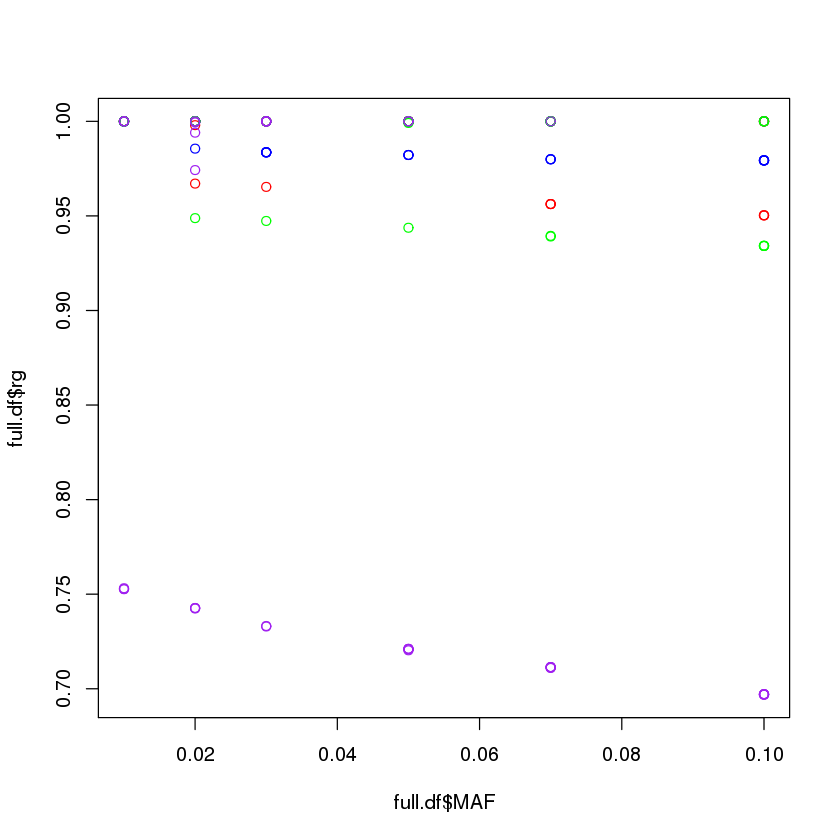

In [14]:
plot(full.df$rg ~ full.df$MAF, col=c("red", "blue", "green", "purple")[sapply(full.df$trait, as.factor)])

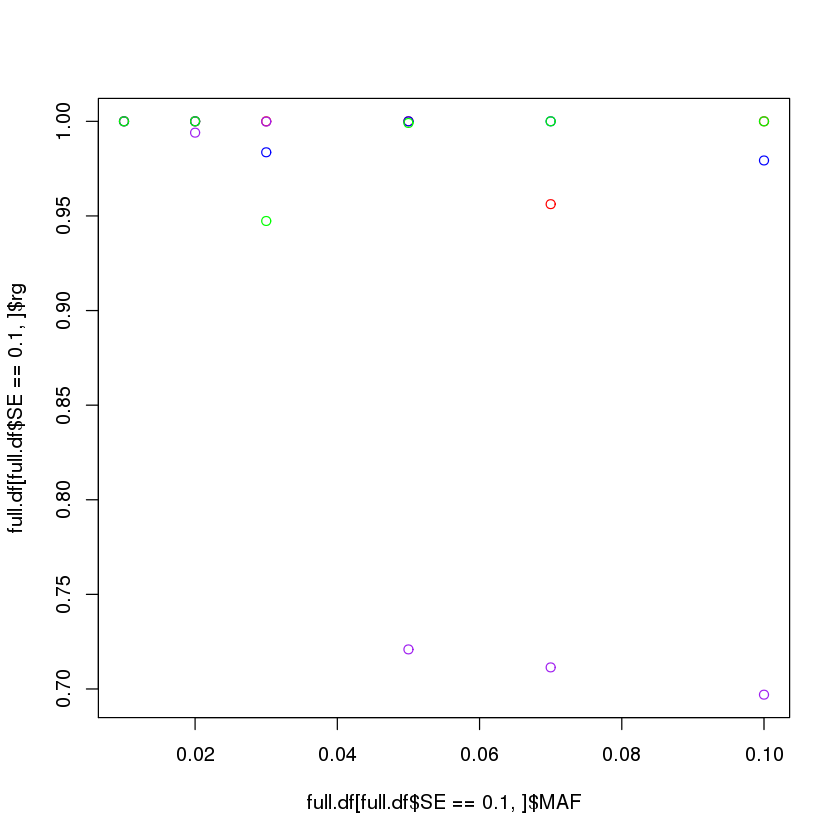

In [17]:
plot(full.df[full.df$SE==0.1,]$rg ~ full.df[full.df$SE==0.1,]$MAF, col=c("red", "blue", "green", "purple")[sapply(full.df[full.df$SE==0.1,]$trait, as.factor)])